In [1]:
#read libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 1. Data Preprocess

## 1.1 Check Main Dataset

In [2]:
app_train = pd.read_csv('application_train.csv')

In [3]:
app_test = pd.read_csv('application_test.csv')

In [4]:
print(app_train.shape,app_test.shape)

(307511, 122) (48744, 121)


In [5]:
app_train_target = app_train['TARGET']

In [6]:
app_train.shape

(307511, 122)

In [7]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## 1.2 Check Target distribution

In [9]:
target_percent = app_train_target.value_counts()/app_train_target.count()
target_percent

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

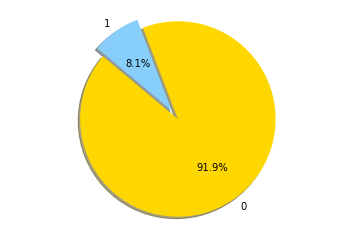

In [10]:
#plot data
labels = '0', '1'
sizes = [target_percent[0], target_percent[1]]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

#plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

The target is highly biased with most of people pay their on time and a very small portion of default records.

## 1.3 Check Missing Value

In [11]:
number_null = app_train.isnull().sum().sort_values(ascending=False)

In [12]:
percent_null = ((app_train.isnull().sum())/(app_train.isnull().count())*100).sort_values(ascending=False)

In [13]:
app_train_miss = pd.concat([number_null,percent_null], axis=1,keys =['Amount','Percent'])

In [14]:
temp=app_train_miss['Percent'].where(app_train_miss['Percent'] != 0).count()
print("There're %d columns have empty value in the training set"%(temp))

There're 67 columns have empty value in the training set


In [15]:
app_train_miss.head()

,Amount,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963


In [16]:
train_missing_col=app_train_miss.index.tolist()

In [17]:
number_null2 = app_test.isnull().sum().sort_values(ascending=False)

In [18]:
percent_null2 = ((app_test.isnull().sum())/(app_test.isnull().count())*100).sort_values(ascending=False)

In [19]:
app_test_miss = pd.concat([number_null2,percent_null2], axis=1,keys =['Amount','Percent'])

In [20]:
temp2=app_test_miss['Percent'].where(app_test_miss['Percent'] != 0).count()
print("There're %d columns have empty value in the test set"%(temp))

There're 67 columns have empty value in the test set


In [21]:
app_test_miss.head()

,Amount,Percent
COMMONAREA_MEDI,33495,68.716150
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523


In [22]:
test_missing_col=app_train_miss.index.tolist()

In [23]:
[x for x in train_missing_col if x not in test_missing_col]

[]

missing values in test set is all the columns in the training set, so we can simply drop the columns with over 50% missing values.

In [24]:
app_train_miss.loc[app_train_miss['Percent']>30]

,Amount,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


In [25]:
drop_col=app_train_miss.loc[app_train_miss['Percent']>30].index.tolist()

In [26]:
len(drop_col)

50

In [27]:
app_train_clean=app_train.drop(columns=drop_col)

In [28]:
app_test_clean=app_test.drop(columns=drop_col)

In [29]:
[x for x in train_missing_col if x not in drop_col]

['EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'NAME_TYPE_SUITE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_CREDIT',
 'FLAG_OWN_CAR',
 'FLAG_EMAIL',
 'TARGET',
 'FLAG_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_WORK_PHONE',
 'FLAG_EMP_PHONE',
 'FLAG_MOBIL',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_REALTY',
 'AMT_INCOME_TOTAL',
 'DAYS_ID_PUBLISH',
 'DAYS_REGISTRATION',
 'DAYS_EMPLOYED',
 'DAYS_BIRTH',
 'REGION_POPULATION_RELATIVE',
 'REGION_RATING_CLIENT',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE',
 'CNT_CHILDREN',
 'NAME_HOUSING_TYPE',
 'REG_REGION_NOT_LIVE_REGION',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'FL

In [30]:
app_train=app_train_clean.fillna(0)
app_test=app_test_clean.fillna(0)

drop columns with 30% missing value and fill the rest with 0.

## 1.4 Check Categorical Data

In [31]:
app_train.dtypes.value_counts()

int64      41
float64    20
object     11
dtype: int64

In [32]:
object_train = app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)
object_test =app_test.select_dtypes('object').apply(pd.Series.nunique, axis = 0)
compare_categorical = pd.concat([object_train,object_test], axis=1,keys =['Train','Test'])

In [33]:
compare_categorical 

,Train,Test
NAME_CONTRACT_TYPE,2,2
CODE_GENDER,3,2
FLAG_OWN_CAR,2,2
FLAG_OWN_REALTY,2,2
NAME_TYPE_SUITE,8,8
NAME_INCOME_TYPE,8,7
NAME_EDUCATION_TYPE,5,5
NAME_FAMILY_STATUS,6,5
NAME_HOUSING_TYPE,6,6
WEEKDAY_APPR_PROCESS_START,7,7


In [34]:
app_train=app_train[app_train.CODE_GENDER.isin(app_test.CODE_GENDER)]

In [35]:
app_train=app_train[app_train.NAME_INCOME_TYPE.isin(app_test.NAME_INCOME_TYPE)]

In [36]:
app_train=app_train[app_train.NAME_FAMILY_STATUS.isin(app_test.NAME_FAMILY_STATUS)]

Delete the rows that contains features not shown in the test set.

## 1.5 Encoding categorical variables

For any categorical variable (dtype == object) with 2 unique categories, we will use label encoding, and for any categorical variable with more than 2 unique categories, we will use one-hot encoding.

In [37]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

4 columns were label encoded.


In [38]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307500, 161)
Testing Features shape:  (48744, 160)


## 1.6 Abnormal value exist in DAYS_EMPLOYED

In [39]:
app_train['DAYS_EMPLOYED'].describe()

count    307500.000000
mean      63817.429333
std      141277.730537
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

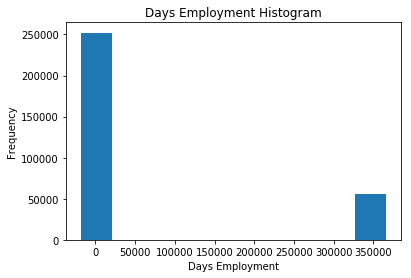

In [40]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [41]:
#app_test['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
#plt.xlabel('Days Employment');

In [42]:
# set another variabel to denote whether a records is belong to that abonraml group or not
app_train['DAYS_EMPLOYED_abno'] = app_train['DAYS_EMPLOYED']==365243
#app_test['DAYS_EMPLOYED_abno'] = app_test['DAYS_EMPLOYED']==365243

In [43]:
print(app_train.shape,app_test.shape)

(307500, 162) (48744, 160)


In [44]:
#set the abnormal value to nan
app_train['DAYS_EMPLOYED']=app_train['DAYS_EMPLOYED'].replace(365243, np.nan)
#app_test['DAYS_EMPLOYED']=app_test['DAYS_EMPLOYED'].replace(365243, np.nan)

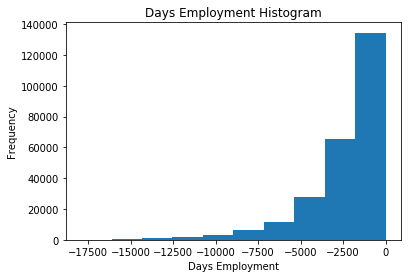

In [45]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [46]:
#app_test['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
#plt.xlabel('Days Employment');

In [47]:
app_train=app_train[app_train['DAYS_EMPLOYED_abno'] == False].drop(columns='DAYS_EMPLOYED_abno')

In [48]:
#app_test=app_test[app_test['DAYS_EMPLOYED_abno'] == False].drop(columns='DAYS_EMPLOYED_abno')

# 3. Modeling

In [49]:
import h2o

In [50]:
h2o.init(strict_version_check=False)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_201"; Java(TM) SE Runtime Environment (build 1.8.0_201-b09); Java HotSpot(TM) 64-Bit Server VM (build 25.201-b09, mixed mode)
  Starting server from /anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/j_/91528bg16832qf6lmlyk_t6c0000gn/T/tmppgzygyl8
  JVM stdout: /var/folders/j_/91528bg16832qf6lmlyk_t6c0000gn/T/tmppgzygyl8/h2o_novacation_started_from_python.out
  JVM stderr: /var/folders/j_/91528bg16832qf6lmlyk_t6c0000gn/T/tmppgzygyl8/h2o_novacation_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.3
H2O cluster version age:,5 months and 1 day !!!
H2O cluster name:,H2O_from_python_novacation_j3gjf6
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [51]:
#import the dataset into h2o
trainset=h2o.H2OFrame(app_train)
scoreset=h2o.H2OFrame(app_test)
trainset['TARGET']=trainset['TARGET'].asfactor()
trainset['TARGET']=trainset['TARGET'].asfactor()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [52]:
##split the dataset
train, valid, test = trainset.split_frame([0.4,0.3],seed=12345)

In [53]:
train.describe()

Rows:101020
Cols:161




,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE_0,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGA

In [54]:
##define variables
X=app_train.columns[2:].tolist()
y=app_train.columns[1]

In [55]:
type(X)

list

In [56]:
scoreset_ID=scoreset[0]

## 3.1 penalized logistic regression

In [57]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [58]:
# elastic net regularized regression
#   - binomial family for logistic regression
#   - L1 for variable selection
#   - L2 for handling multicollinearity
#   - IRLS for handling outliers
#   - with lamba parameter tuning for variable selection

# initialize
repeater_glm = H2OGeneralizedLinearEstimator(family='binomial',
                                         model_id='repeater_glm',
                                         solver='IRLSM',
                                         standardize=True,
                                         lambda_search=True,
                                         seed=12345,
                                         nfolds=3)


In [59]:
# train 
repeater_glm.train(X, y, training_frame=train,validation_frame=valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [60]:
print(repeater_glm)

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  repeater_glm


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.07377558771895758
RMSE: 0.27161661900361983
LogLoss: 0.26576512138981495
Null degrees of freedom: 101019
Residual degrees of freedom: 100889
Null deviance: 59330.76087178585
Residual deviance: 53695.18512559821
AIC: 53957.18512559821
AUC: 0.7303291048913507
pr_auc: 0.21099153901255152
Gini: 0.46065820978270144
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.14706631131098896: 


,0,1,Error,Rate
0,80261.0,12051.0,0.1305,(12051.0/92312.0)
1,5287.0,3421.0,0.6071,(5287.0/8708.0)
Total,85548.0,15472.0,0.1716,(17338.0/101020.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1470663,0.2829611,185.0
max f2,0.0765120,0.4080999,277.0
max f0point5,0.2109251,0.2648401,129.0
max accuracy,0.5206277,0.9139081,7.0
max precision,0.5206277,0.6666667,7.0
max recall,0.0054384,1.0,398.0
max specificity,0.6555643,0.9999892,0.0
max absolute_mcc,0.1506901,0.2044883,181.0
max min_per_class_accuracy,0.0865586,0.6639871,261.0
max mean_per_class_accuracy,0.0808479,0.6670337,270.0


Gains/Lift Table: Avg response rate:  8.62 %, avg score:  8.62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100079,0.3445248,4.4291980,4.4291980,0.3818002,0.4001638,0.3818002,0.4001638,0.0443271,0.0443271,342.9197977,342.9197977
,2,0.0200059,0.2967912,3.5836218,4.0066191,0.3089109,0.3181397,0.3453736,0.3591720,0.0358291,0.0801562,258.3621752,300.6619062
,3,0.0300040,0.2696563,3.3424164,3.7852912,0.2881188,0.2825210,0.3262950,0.3336301,0.0334175,0.1135737,234.2416442,278.5291234
,4,0.0400020,0.2480359,3.1930989,3.6372798,0.2752475,0.2587524,0.3135363,0.3149153,0.0319247,0.1454984,219.3098869,263.7279779
,5,0.05,0.2315496,2.6877163,3.4474047,0.2316832,0.2397342,0.2971689,0.2998821,0.0268718,0.1723702,168.7716314,244.7404685
,6,0.1,0.1788376,2.3472669,2.8973358,0.2023362,0.2022810,0.2497525,0.2510815,0.1173633,0.2897336,134.7266881,189.7335783
,7,0.15,0.1481706,1.9522278,2.5822998,0.1682835,0.1625151,0.2225962,0.2215594,0.0976114,0.3873450,95.2227836,158.2299801
,8,0.2,0.1271787,1.5342214,2.3202802,0.1322510,0.1369845,0.2000099,0.2004157,0.0767111,0.4640560,53.4221406,132.0280202
,9,0.3,0.0988099,1.3125861,1.9843822,0.1131459,0.1118343,0.1710552,0.1708885,0.1312586,0.5953147,31.2586128,98.4382177
,10,0.4,0.0793658,1.0909508,1.7610243,0.0940408,0.0885456,0.1518016,0.1503028,0.1090951,0.7044097,9.0950850,76.1024345




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.07402576301093777
RMSE: 0.27207675940979925
LogLoss: 0.26727089798224424
Null degrees of freedom: 75628
Residual degrees of freedom: 75498
Null deviance: 44402.723424329146
Residual deviance: 40426.8614869983
AIC: 40688.8614869983
AUC: 0.7248210324535285
pr_auc: 0.20643331231098144
Gini: 0.44964206490705694
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12390236789646188: 


,0,1,Error,Rate
0,56234.0,12879.0,0.1863,(12879.0/69113.0)
1,3412.0,3104.0,0.5236,(3412.0/6516.0)
Total,59646.0,15983.0,0.2154,(16291.0/75629.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1239024,0.2759234,212.0
max f2,0.0813754,0.4078534,271.0
max f0point5,0.2036494,0.2563459,135.0
max accuracy,1.0,0.9138558,0.0
max precision,1.0,1.0,0.0
max recall,0.0040049,1.0,399.0
max specificity,1.0,1.0,0.0
max absolute_mcc,0.1201426,0.2002334,217.0
max min_per_class_accuracy,0.0861759,0.6645638,263.0
max mean_per_class_accuracy,0.0849867,0.6671955,265.0


Gains/Lift Table: Avg response rate:  8.62 %, avg score:  8.62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100094,0.3385467,4.4924063,4.4924063,0.3870542,0.3961507,0.3870542,0.3961507,0.0449662,0.0449662,349.2406255,349.2406255
,2,0.0200056,0.2939295,3.7460650,4.1194823,0.3227513,0.3144658,0.3549240,0.3553352,0.0374463,0.0824125,274.6065038,311.9482289
,3,0.0300017,0.2661424,3.2394251,3.8262592,0.2791005,0.2794023,0.3296606,0.3300354,0.0323818,0.1147944,223.9425094,282.6259178
,4,0.0400111,0.2461851,2.6985102,3.5441356,0.2324967,0.2557051,0.3053536,0.3114406,0.0270104,0.1418048,169.8510242,254.4135601
,5,0.0500073,0.2299401,2.7481379,3.3850202,0.2367725,0.2377300,0.2916446,0.2967062,0.0274708,0.1692756,174.8137876,238.5020244
,6,0.1000013,0.1780797,2.1303947,2.7577904,0.1835493,0.2006391,0.2376041,0.2486790,0.1065071,0.2757827,113.0394712,175.7790423
,7,0.1500086,0.1482737,1.9395583,2.4850223,0.1671074,0.1625045,0.2141031,0.2199516,0.0969920,0.3727747,93.9558290,148.5022338
,8,0.2000026,0.1275551,1.6975624,2.2881834,0.1462576,0.1374388,0.1971440,0.1993262,0.0848680,0.4576427,69.7562357,128.8183373
,9,0.3000040,0.0990766,1.3505039,1.9756236,0.1163559,0.1121574,0.1702146,0.1702699,0.1350522,0.5926949,35.0503936,97.5623560
,10,0.4000053,0.0795262,1.1064924,1.7583408,0.0953325,0.0887677,0.1514941,0.1498944,0.1106507,0.7033456,10.6492429,75.8340777




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.07408525047580218
RMSE: 0.2721860585625248
LogLoss: 0.26731214386729685
Null degrees of freedom: 101019
Residual degrees of freedom: 100883
Null deviance: 59334.719838333986
Residual deviance: 54007.745546948674
AIC: 54281.745546948674
AUC: 0.7245027882564224
pr_auc: 0.20495162866257977
Gini: 0.4490055765128449
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1428235200590688: 


,0,1,Error,Rate
0,79413.0,12899.0,0.1397,(12899.0/92312.0)
1,5225.0,3483.0,0.6,(5225.0/8708.0)
Total,84638.0,16382.0,0.1794,(18124.0/101020.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1428235,0.2776405,191.0
max f2,0.0756249,0.4036176,278.0
max f0point5,0.2056329,0.2594848,131.0
max accuracy,0.5314132,0.9138487,7.0
max precision,0.5816197,0.7142857,3.0
max recall,0.0055818,1.0,398.0
max specificity,0.6683753,0.9999892,0.0
max absolute_mcc,0.1361993,0.1983908,198.0
max min_per_class_accuracy,0.0861332,0.6603124,261.0
max mean_per_class_accuracy,0.0816419,0.6626091,268.0


Gains/Lift Table: Avg response rate:  8.62 %, avg score:  8.62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100079,0.3413939,4.2456043,4.2456043,0.3659743,0.3983308,0.3659743,0.3983308,0.0424897,0.0424897,324.5604279,324.5604279
,2,0.0200059,0.2956683,3.4113322,3.8286747,0.2940594,0.3152172,0.3300346,0.3567945,0.0341066,0.0765962,241.1332245,282.8674662
,3,0.0300040,0.2667910,3.3539024,3.6704695,0.2891089,0.2808247,0.3163972,0.3314796,0.0335324,0.1101286,235.3902409,267.0469458
,4,0.0400020,0.2478721,3.0667532,3.5195778,0.2643564,0.2571941,0.3033902,0.3129128,0.0306615,0.1407901,206.6753230,251.9577750
,5,0.05,0.2308288,2.6532584,3.3463482,0.2287129,0.2392525,0.2884577,0.2981837,0.0265273,0.1673174,165.3258413,234.6348186
,6,0.1,0.1779170,2.3403767,2.8433624,0.2017422,0.2013980,0.2451000,0.2497908,0.1170188,0.2843362,134.0376665,184.3362425
,7,0.15,0.1480041,1.8994028,2.5287092,0.1637300,0.1619910,0.2179766,0.2205242,0.0949701,0.3793064,89.9402848,152.8709233
,8,0.2,0.1269515,1.5319247,2.2795131,0.1320531,0.1368589,0.1964957,0.1996079,0.0765962,0.4559026,53.1924667,127.9513091
,9,0.3,0.0988251,1.3367019,1.9652427,0.1152247,0.1118569,0.1694054,0.1703576,0.1336702,0.5895728,33.6701883,96.5242689
,10,0.4,0.0797357,1.0645384,1.7400666,0.0917640,0.0887486,0.1499951,0.1499553,0.1064538,0.6960266,6.4538356,74.0066605



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
accuracy,0.8237435,0.0046537,0.8289236,0.82785,0.8144568
auc,0.7248255,0.0045048,0.7327838,0.7171885,0.7245042
err,0.1762565,0.0046537,0.1710764,0.17215,0.1855432
err_count,5935.3335,161.50783,5787.0,5761.0,6258.0
f0point5,0.2377825,0.0082528,0.2540778,0.2319093,0.2273605
---,---,---,---,---,---
r2,0.0596861,0.0037737,0.0671270,0.0548715,0.0570599
recall,0.3969019,0.0133441,0.4068989,0.3704735,0.4133333
residual_deviance,17996.865,121.0188450,18223.094,17958.264,17809.236
rmse,0.2721314,0.0011351,0.274004,0.2723064,0.2700838



See the whole table with table.as_data_frame()
Scoring History: 


,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,deviance_xval,deviance_se
,2019-06-27 15:05:35,0.000 sec,1,.95E-1,1,0.5873170,0.5871124,0.5873417,0.0052290
,2019-06-27 15:05:35,0.099 sec,3,.86E-1,2,0.5841406,0.5839055,0.5873027,0.0052195
,2019-06-27 15:05:35,0.184 sec,5,.79E-1,2,0.5813839,0.5811214,0.5873027,0.0052195
,2019-06-27 15:05:35,0.350 sec,7,.72E-1,2,0.5788278,0.5785390,0.5873027,0.0052195
,2019-06-27 15:05:36,0.472 sec,9,.65E-1,3,0.5759033,0.5756341,0.5872500,0.0052287
---,---,---,---,---,---,---,---,---,---
,2019-06-27 15:05:46,11.148 sec,80,.43E-3,129,0.5317964,0.5346813,0.5348283,0.0033718
,2019-06-27 15:05:46,11.371 sec,81,.39E-3,130,0.5317196,0.5346444,0.5347534,0.0033631
,2019-06-27 15:05:47,11.609 sec,82,.36E-3,131,0.5316509,0.5346150,0.5347630,0.0033744
,2019-06-27 15:05:47,11.853 sec,83,.32E-3,131,0.5315302,0.5345418,0.5346259,0.0033267



See the whole table with table.as_data_frame()



In [61]:
glm_pred_result=repeater_glm.predict(scoreset)

glm prediction progress: |████████████████████████████████████████████████| 100%


In [62]:
glm_output=scoreset_ID.cbind(glm_pred_result[0])

In [63]:
glm_output.set_names(['SK_ID_CURR','TARGET'])

SK_ID_CURR,TARGET
100001,0
100005,1
100013,0
100028,0
100038,1
100042,0
100057,0
100065,0
100066,0
100067,0


In [66]:
#h2o.export_file(glm_output, 'glm_output.csv')

Export File progress: |███████████████████████████████████████████████████| 100%


## 3.2 Random Forest

In [64]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [65]:
rf = H2ORandomForestEstimator(
    model_id="rf",
    ntrees=500,
    stopping_rounds=2,
    score_each_iteration=True,
    seed=12345)

In [66]:
rf.train(X, y, training_frame=train, validation_frame=valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [67]:
print(rf)

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.07741014843555862
RMSE: 0.27822679316622007
LogLoss: 0.2924298668306602
Mean Per-Class Error: 0.38342484991184256
AUC: 0.6656636999911985
pr_auc: 0.15951296352192837
Gini: 0.3313273999823969
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.14262295614207898: 


,0,1,Error,Rate
0,74390.0,17922.0,0.1941,(17922.0/92312.0)
1,5223.0,3485.0,0.5998,(5223.0/8708.0)
Total,79613.0,21407.0,0.2291,(23145.0/101020.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1426230,0.2314461,203.0
max f2,0.0396926,0.3638971,332.0
max f0point5,0.2028478,0.2048519,146.0
max accuracy,0.6925419,0.9138091,0.0
max precision,0.6925419,1.0,0.0
max recall,0.0000292,1.0,399.0
max specificity,0.6925419,1.0,0.0
max absolute_mcc,0.1426230,0.1415187,203.0
max min_per_class_accuracy,0.0889975,0.6131272,266.0
max mean_per_class_accuracy,0.0974732,0.6165752,255.0


Gains/Lift Table: Avg response rate:  8.62 %, avg score:  8.97 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100079,0.3566208,3.3276358,3.3276358,0.2868447,0.4162561,0.2868447,0.4162561,0.0333027,0.0333027,232.7635786,232.7635786
,2,0.0200059,0.3146355,2.5498847,2.9389527,0.2198020,0.3337698,0.2533399,0.3750334,0.0254938,0.0587965,154.9884708,193.8952664
,3,0.0300040,0.2883065,2.4809689,2.7863418,0.2138614,0.3011227,0.2401848,0.3504046,0.0248048,0.0836013,148.0968905,178.6341778
,4,0.0400020,0.2681982,2.4005671,2.6899220,0.2069307,0.2779212,0.2318733,0.3322882,0.0240009,0.1076022,140.0567135,168.9921984
,5,0.05,0.2525037,2.3890812,2.6297657,0.2059406,0.2598138,0.2266878,0.3177962,0.0238861,0.1314883,138.9081168,162.9765733
,6,0.1,0.2006945,1.9866789,2.3082223,0.1712532,0.2240290,0.1989705,0.2709126,0.0993339,0.2308222,98.6678916,130.8222324
,7,0.15,0.1688455,1.6008268,2.0724238,0.1379925,0.1837453,0.1786445,0.2418568,0.0800413,0.3108636,60.0826826,107.2423825
,8,0.2,0.1467546,1.4354616,1.9131833,0.1237379,0.1573739,0.1649178,0.2207361,0.0717731,0.3826367,43.5461644,91.3183280
,9,0.3,0.1135235,1.2333486,1.6865717,0.1063156,0.1291499,0.1453838,0.1902074,0.1233349,0.5059715,23.3348645,68.6571735
,10,0.4,0.0898846,1.0404226,1.5250345,0.0896852,0.1012281,0.1314591,0.1679625,0.1040423,0.6100138,4.0422600,52.5034451




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.07497176948540792
RMSE: 0.27380973226934047
LogLoss: 0.27338553814199607
Mean Per-Class Error: 0.3537809533584988
AUC: 0.6990522531685083
pr_auc: 0.19044328152723927
Gini: 0.39810450633701655
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.15044055256098632: 


,0,1,Error,Rate
0,59534.0,9579.0,0.1386,(9579.0/69113.0)
1,4099.0,2417.0,0.6291,(4099.0/6516.0)
Total,63633.0,11996.0,0.1809,(13678.0/75629.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1504406,0.2611279,165.0
max f2,0.0772229,0.3863300,271.0
max f0point5,0.2092752,0.2413258,108.0
max accuracy,0.5153895,0.9138426,0.0
max precision,0.5153895,0.5,0.0
max recall,0.0005078,1.0,399.0
max specificity,0.5153895,0.9999855,0.0
max absolute_mcc,0.1515696,0.1785037,164.0
max min_per_class_accuracy,0.0935938,0.6452621,244.0
max mean_per_class_accuracy,0.0928538,0.6462190,245.0


Gains/Lift Table: Avg response rate:  8.62 %, avg score:  8.92 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100094,0.3052070,4.2777520,4.2777520,0.3685601,0.3476396,0.3685601,0.3476396,0.0428177,0.0428177,327.7752031,327.7752031
,2,0.0200056,0.2699565,3.1319560,3.7052327,0.2698413,0.2865412,0.3192333,0.3171106,0.0313076,0.0741252,213.1956015,270.5232673
,3,0.0300017,0.2497666,3.1626615,3.5244553,0.2724868,0.2595773,0.3036580,0.2979413,0.0316145,0.1057397,216.2661467,252.4455312
,4,0.0400111,0.2337788,2.8978320,3.3676959,0.2496697,0.2415052,0.2901520,0.2838229,0.0290055,0.1347452,189.7832021,236.7695950
,5,0.0500073,0.2204019,2.3796725,3.1701957,0.2050265,0.2270870,0.2731359,0.2724817,0.0237876,0.1585328,137.9672463,217.0195750
,6,0.1000013,0.1792394,2.1795104,2.6749186,0.1877810,0.1980470,0.2304641,0.2352693,0.1089626,0.2674954,117.9510440,167.4918591
,7,0.1500086,0.1534861,1.7400784,2.3632777,0.1499207,0.1653781,0.2036139,0.2119702,0.0870166,0.3545120,74.0078403,136.3277728
,8,0.2000026,0.1357796,1.5256573,2.1539003,0.1314467,0.1442004,0.1855745,0.1950300,0.0762738,0.4307858,52.5657308,115.3900311
,9,0.3000040,0.1095395,1.2599588,1.8559198,0.1085548,0.1217794,0.1599013,0.1706131,0.1259975,0.5567833,25.9958785,85.5919802
,10,0.4000053,0.0895681,1.0773338,1.6612733,0.0928203,0.0991450,0.1431310,0.1527461,0.1077348,0.6645181,7.7333821,66.1273307



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
,2019-06-27 15:07:08,0.039 sec,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2019-06-27 15:07:10,1.662 sec,1.0,0.3384089,2.7501575,0.5650266,0.1010836,1.6258994,0.2435432,0.3401393,2.7160327,0.5703011,0.1066860,1.6133223,0.2599796
,2019-06-27 15:07:11,3.327 sec,2.0,0.3326190,2.3825569,0.5634785,0.1043626,1.4833118,0.2456647,0.3080320,0.9680375,0.6064748,0.1255105,2.4467269,0.2770101
,2019-06-27 15:07:13,4.872 sec,3.0,0.3276676,2.0605555,0.5737096,0.1079731,1.4480308,0.2540123,0.2966262,0.6230319,0.6242701,0.1313525,2.1590226,0.3115868
,2019-06-27 15:07:14,5.918 sec,4.0,0.3220278,1.7436454,0.5850423,0.1128379,1.4678072,0.2530614,0.2904557,0.4707736,0.6377691,0.1364921,2.1925396,0.3227730
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2019-06-27 15:07:49,40.809 sec,33.0,0.2790207,0.2980879,0.6627147,0.1552813,3.1440421,0.2184320,0.2740876,0.2740730,0.6965705,0.1874982,4.1550925,0.2001878
,2019-06-27 15:07:50,42.342 sec,34.0,0.2788506,0.2968390,0.6631102,0.1560356,3.1669913,0.2300040,0.2740285,0.2738905,0.6971665,0.1882181,4.1397600,0.1875735
,2019-06-27 15:07:52,43.797 sec,35.0,0.2786255,0.2956768,0.6642037,0.1570614,3.1210929,0.2175708,0.2739126,0.2735703,0.6985105,0.1892849,4.1550925,0.1859736
,2019-06-27 15:07:53,45.404 sec,36.0,0.2784611,0.2941318,0.6645250,0.1577846,3.1210929,0.2419224,0.2738786,0.2735281,0.6985846,0.1895742,4.2164223,0.1742189



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
EXT_SOURCE_2,7788.9711914,1.0,0.0769804
EXT_SOURCE_3,6497.4941406,0.8341916,0.0642164
DAYS_BIRTH,4169.7993164,0.5353466,0.0412112
DAYS_ID_PUBLISH,4043.1691895,0.5190890,0.0399597
DAYS_EMPLOYED,3845.5441895,0.4937166,0.0380065
---,---,---,---
FLAG_DOCUMENT_10,0.0,0.0,0.0
NAME_INCOME_TYPE_Businessman,0.0,0.0,0.0
NAME_INCOME_TYPE_Student,0.0,0.0,0.0
ORGANIZATION_TYPE_Industry: type 8,0.0,0.0,0.0



See the whole table with table.as_data_frame()



In [68]:
rf_pred_result=rf.predict(scoreset)

drf prediction progress: |████████████████████████████████████████████████| 100%


In [70]:
rf_output=scoreset_ID.cbind(rf_pred_result[0])
rf_output.set_names(['SK_ID_CURR','TARGET'])

SK_ID_CURR,TARGET
100001,0
100005,1
100013,0
100028,0
100038,0
100042,0
100057,0
100065,0
100066,0
100067,0


In [71]:
h2o.export_file(rf_output, 'rf_output.csv')

Export File progress: |███████████████████████████████████████████████████| 100%


## 3.3 GBM

In [72]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator 
from h2o.grid.grid_search import H2OGridSearch

In [79]:
# define random grid search parameters
hyper_parameters = {'ntrees':list(range(0, 1000, 100)),
                    'max_depth':list(range(0, 20, 2)),
                    "learn_rate":[s/float(100) for s in range(1, 11)],
                    'sample_rate':[s/float(10) for s in range(1, 11)],
                    'col_sample_rate':[s/float(10) for s in range(1, 11)],
                    "seed":[12345]}

# define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':100,
                   'max_runtime_secs':600}

# initialize grid search
gsearch = H2OGridSearch(H2OGradientBoostingEstimator,
                        hyper_params=hyper_parameters,
                        search_criteria=search_criteria)

# execute training w/ grid search
gsearch.train(x=X,
              y=y,
              training_frame=train,
              validation_frame=valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [80]:
# show grid search results
gsearch.show()

    col_sample_rate learn_rate max_depth ntrees sample_rate   seed  \
0               0.2       0.06         8    100         0.6  12345   
1               0.5        0.1        10    600         0.7  12345   
2               0.3       0.08        18    900         0.6  12345   

                                                       model_ids  \
0  Grid_GBM_py_5_sid_8379_model_python_1561662162591_373_model_2   
1  Grid_GBM_py_5_sid_8379_model_python_1561662162591_373_model_1   
2  Grid_GBM_py_5_sid_8379_model_python_1561662162591_373_model_3   

               logloss  
0  0.26244477350497597  
1  0.28149009982336687  
2   0.6374348221850411  


In [81]:
# select best model
gbm_model = gsearch.get_grid()[0]
# print model information
gbm_model

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  Grid_GBM_py_5_sid_8379_model_python_1561662162591_373_model_2


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.06428485264822101
RMSE: 0.25354457724080987
LogLoss: 0.22718602450921857
Mean Per-Class Error: 0.23011442382114655
AUC: 0.8531521338202656
pr_auc: 0.4361783481751685
Gini: 0.7063042676405311
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1794611425565266: 


,0,1,Error,Rate
0,85824.0,6488.0,0.0703,(6488.0/92312.0)
1,4459.0,4249.0,0.5121,(4459.0/8708.0)
Total,90283.0,10737.0,0.1084,(10947.0/101020.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1794611,0.4370275,182.0
max f2,0.1064669,0.5365761,253.0
max f0point5,0.2777432,0.4668972,120.0
max accuracy,0.3298731,0.9220550,97.0
max precision,0.8254474,1.0,0.0
max recall,0.0166621,1.0,389.0
max specificity,0.8254474,1.0,0.0
max absolute_mcc,0.1951179,0.3805854,171.0
max min_per_class_accuracy,0.0995555,0.7682966,261.0
max mean_per_class_accuracy,0.0995555,0.7698856,261.0


Gains/Lift Table: Avg response rate:  8.62 %, avg score:  8.62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100079,0.4170404,9.3059056,9.3059056,0.8021761,0.5044320,0.8021761,0.5044320,0.0931328,0.0931328,830.5905594,830.5905594
,2,0.0200059,0.3433354,6.8226645,8.0648994,0.5881188,0.3754145,0.6952004,0.4399552,0.0682131,0.1613459,582.2664490,706.4899401
,3,0.0300040,0.3032293,5.9152731,7.3485937,0.5099010,0.3218210,0.6334543,0.4005901,0.0591410,0.2204869,491.5273084,634.8593700
,4,0.0400020,0.2737549,4.4795272,6.6315046,0.3861386,0.2873923,0.5716407,0.3722976,0.0447864,0.2652733,347.9527190,563.1504570
,5,0.05,0.2518827,4.1808920,6.1414791,0.3603960,0.2620750,0.5294001,0.3502575,0.0418006,0.3070740,318.0892044,514.1479100
,6,0.1,0.1844086,3.2613689,4.7014240,0.2811324,0.2136994,0.4052663,0.2819785,0.1630684,0.4701424,226.1368856,370.1423978
,7,0.15,0.1483117,2.2553973,3.8860818,0.1944169,0.1649946,0.3349832,0.2429838,0.1127699,0.5829123,125.5397336,288.6081764
,8,0.2,0.1244370,1.7868627,3.3612770,0.1540289,0.1354977,0.2897446,0.2161123,0.0893431,0.6722554,78.6862655,236.1276987
,9,0.3,0.0936033,1.1885622,2.6370387,0.1024550,0.1075429,0.2273147,0.1799225,0.1188562,0.7911116,18.8562242,163.7038738
,10,0.4,0.0736963,0.7648140,2.1689825,0.0659275,0.0830700,0.1869679,0.1557094,0.0764814,0.8675930,-23.5186036,116.8982545




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.07283751437519778
RMSE: 0.2698842610735161
LogLoss: 0.26244477350497597
Mean Per-Class Error: 0.32184200575712185
AUC: 0.7410680535840465
pr_auc: 0.23139476622580515
Gini: 0.48213610716809296
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1365506421084959: 


,0,1,Error,Rate
0,58941.0,10172.0,0.1472,(10172.0/69113.0)
1,3573.0,2943.0,0.5483,(3573.0/6516.0)
Total,62514.0,13115.0,0.1817,(13745.0/75629.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1365506,0.2998319,214.0
max f2,0.0770439,0.4190751,285.0
max f0point5,0.2537094,0.2864429,125.0
max accuracy,0.5539323,0.9140145,19.0
max precision,0.7922243,1.0,0.0
max recall,0.0081466,1.0,399.0
max specificity,0.7922243,1.0,0.0
max absolute_mcc,0.1338164,0.2257836,217.0
max min_per_class_accuracy,0.0836793,0.6751074,276.0
max mean_per_class_accuracy,0.0869375,0.6781580,272.0


Gains/Lift Table: Avg response rate:  8.62 %, avg score:  8.52 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100094,0.3835900,5.2896934,5.2896934,0.4557464,0.4609905,0.4557464,0.4609905,0.0529466,0.0529466,428.9693371,428.9693371
,2,0.0200056,0.3231839,3.9917086,4.6411300,0.3439153,0.3492552,0.3998678,0.4051597,0.0399018,0.0928484,299.1708647,364.1129953
,3,0.0300017,0.2878670,3.7460650,4.3429065,0.3227513,0.3042352,0.3741736,0.3715331,0.0374463,0.1302947,274.6065038,334.2906473
,4,0.0400111,0.2633075,3.1738160,4.0504407,0.2734478,0.2751005,0.3489755,0.3474090,0.0317680,0.1620626,217.3816023,305.0440687
,5,0.0500073,0.2434631,2.8095488,3.8023935,0.2420635,0.2532203,0.3276044,0.3285812,0.0280847,0.1901473,180.9548779,280.2393547
,6,0.1000013,0.1812391,2.2531840,3.0278912,0.1941285,0.2084160,0.2608753,0.2685065,0.1126458,0.3027931,125.3184033,202.7891210
,7,0.1500086,0.1472135,2.0930044,2.7162348,0.1803279,0.1628226,0.2340238,0.2332755,0.1046654,0.4074586,109.3004357,171.6234791
,8,0.2000026,0.1246332,1.6852834,2.4585310,0.1451997,0.1353817,0.2118207,0.2088053,0.0842541,0.4917127,68.5283425,145.8531028
,9,0.3000040,0.0943417,1.2814441,2.0661687,0.1104059,0.1084555,0.1780158,0.1753553,0.1281461,0.6198588,28.1444075,106.6168710
,10,0.4000053,0.0744298,1.0159473,1.8036134,0.0875314,0.0838233,0.1553947,0.1524723,0.1015961,0.7214549,1.5947279,80.3613353



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
,2019-06-27 15:32:23,2 min 7.386 sec,0.0,0.2806603,0.2936585,0.5,0.0,1.0,0.9137992,0.2805964,0.2935562,0.5,0.0,1.0,0.9138426
,2019-06-27 15:32:23,2 min 7.851 sec,1.0,0.2797903,0.2906874,0.6919221,0.1797084,3.3029877,0.2554247,0.2799503,0.2913352,0.6522042,0.1480986,2.6840706,0.2641844
,2019-06-27 15:32:23,2 min 8.164 sec,2.0,0.2787955,0.2874838,0.7299079,0.2189685,4.1502423,0.1812017,0.2792440,0.2890210,0.6842987,0.1703191,3.1830387,0.2177604
,2019-06-27 15:32:24,2 min 8.577 sec,3.0,0.2780093,0.2850246,0.7418428,0.2313474,5.1061997,0.1572461,0.2786715,0.2871711,0.6961406,0.1770844,3.4603708,0.2221767
,2019-06-27 15:32:24,2 min 9.000 sec,4.0,0.2771924,0.2825150,0.7529877,0.2425646,5.1533782,0.1720649,0.2780595,0.2852387,0.7062233,0.1849364,3.7564489,0.2262756
,2019-06-27 15:32:25,2 min 9.420 sec,5.0,0.2763689,0.2801369,0.7586423,0.2536657,5.5766586,0.1777272,0.2774846,0.2835100,0.7107078,0.1913353,3.8944409,0.1884727
,2019-06-27 15:32:25,2 min 9.843 sec,6.0,0.2756106,0.2780077,0.7606544,0.2600707,6.0012190,0.1631954,0.2769287,0.2818786,0.7138919,0.1962993,4.1857574,0.2025942
,2019-06-27 15:32:25,2 min 10.253 sec,7.0,0.2747877,0.2757437,0.7661270,0.2680188,6.2995588,0.1453376,0.2763574,0.2802369,0.7177213,0.2014675,4.1397600,0.1924659
,2019-06-27 15:32:26,2 min 10.667 sec,8.0,0.2741246,0.2739508,0.7689523,0.2717541,6.4602033,0.1505049,0.2759606,0.2790996,0.7186392,0.2027008,4.2010898,0.2046173
,2019-06-27 15:32:26,2 min 11.085 sec,9.0,0.2735170,0.2723351,0.7706040,0.2750671,6.4831525,0.1541675,0.2755776,0.2779879,0.7203069,0.2036439,4.2010898,0.1945418


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
EXT_SOURCE_2,1576.2874756,1.0,0.1762447
EXT_SOURCE_3,1519.5263672,0.9639906,0.1698983
DAYS_BIRTH,388.4689331,0.2464455,0.0434347
DAYS_EMPLOYED,377.5022583,0.2394882,0.0422085
DAYS_ID_PUBLISH,303.5634766,0.1925813,0.0339414
---,---,---,---
ORGANIZATION_TYPE_Industry: type 8,0.0,0.0,0.0
ORGANIZATION_TYPE_Religion,0.0,0.0,0.0
ORGANIZATION_TYPE_Trade: type 4,0.0,0.0,0.0
ORGANIZATION_TYPE_Trade: type 5,0.0,0.0,0.0



See the whole table with table.as_data_frame()


In [83]:
gbm_pred_result=gbm_model.predict(scoreset)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [84]:
gbm_output=scoreset_ID.cbind(gbm_pred_result[0])
gbm_output.set_names(['SK_ID_CURR','TARGET'])

SK_ID_CURR,TARGET
100001,0
100005,0
100013,0
100028,0
100038,0
100042,0
100057,0
100065,0
100066,0
100067,0


In [85]:
h2o.export_file(gbm_output, 'gbm_output.csv')

Export File progress: |███████████████████████████████████████████████████| 100%
